<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

- **Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.
- **Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [1]:
import pandas as pd 
from IPython.display import display 
pd.set_option('display.max_columns', None) 
pd.set_option('display.float_format', '{:.3f}'.format) 

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression 

from sklearn.metrics import r2_score

In [3]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.000,49600.000,1,0
1,0,46.000,38000.000,1,1
2,0,29.000,21000.000,0,0
3,0,21.000,41700.000,2,0
4,1,28.000,26100.000,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000,5000.000,5000.000,5000.000,5000.000
mean,0.499,30.953,39916.360,1.194,0.148
std,0.500,8.441,9900.084,1.091,0.463
min,0.000,18.000,5300.000,0.000,0.000
25%,0.000,24.000,33300.000,0.000,0.000
50%,0.000,30.000,40200.000,1.000,0.000
75%,1.000,37.000,46600.000,2.000,0.000
max,1.000,65.000,79000.000,6.000,5.000


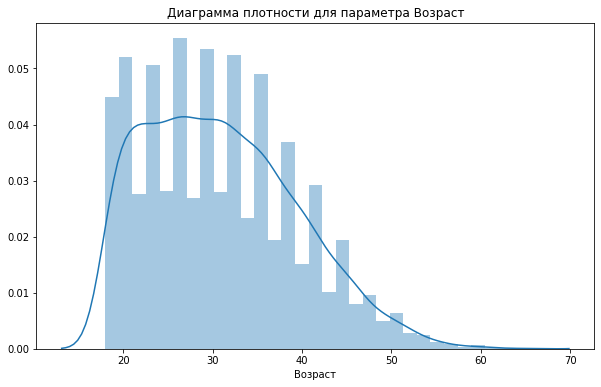

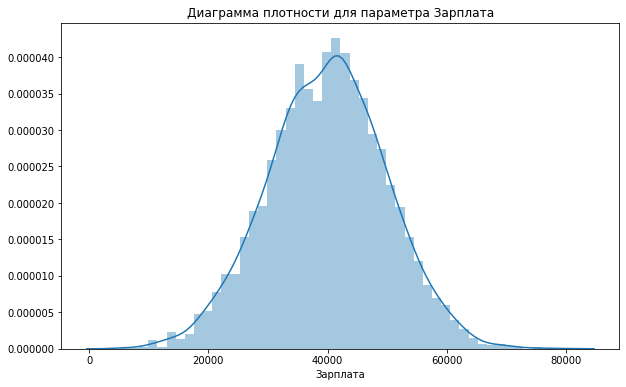

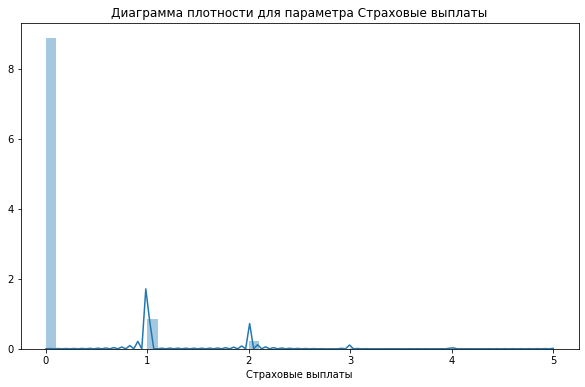

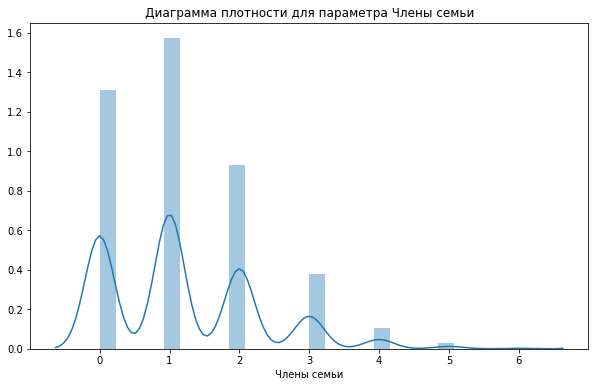

In [6]:
columns = ['Возраст', 'Зарплата', 'Страховые выплаты', 'Члены семьи']
for col in columns:
    plt.figure(figsize=(10,6))
    sns.distplot(df[col])
    plt.title(f'Диаграмма плотности для параметра {col}')

    plt.show()

Проверим дубликаты:

In [7]:
df.duplicated().sum()

153

удалим дубликаты:

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Проверим датасет на мультиколениарность:

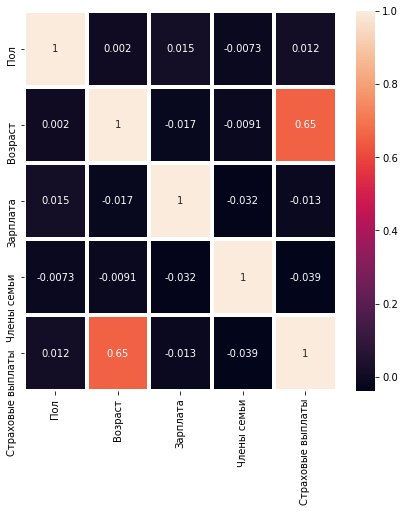

In [9]:
plt.rcParams['figure.figsize'] = (7.0, 7.0)
sns.heatmap(df.corr(), annot=True, linewidths=3, linecolor='white')
plt.show()

Матрица корреляций не выявила значительных зависимостей между обучающими признаками.

### Вывод

**Вывод основных характеристик и параметров показал**:

- Все данные в датасете заполнены (пропусков нет).
- Типы данных изменений не требуют.
- Значительных выбросов и аномальных значений не выявлено.
- Выявлены и удалены дубликаты.
- Предобработка данным не нужна

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос**
- Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

**Ответ:** не изменится

**Обоснование:** 

Для обоснования ответа получим предсказания для домноженных признаков. Пусть наши признаки будут как в исходном датасете размерностью 5000 на 4, а матрица для домножения 4 на 4. Умноженная матрица будет иметь вид X * P. Тогда фомула предсказаний примет следующий вид:

$$
a' = XP'w
$$

$$
a' = X'w' = XPw'
$$

$$
w' = (X'^T X')^{-1} X'^T y = ((XP)^TXP)^{-1})(XP)^Ty
$$

Подставим в формулу предсказаний формулу обучения для матрицы X P:

$$
a' = XP((XP)^TXP)^{-1})(XP)^Ty
$$

Воспользуемся следующими свойствами матриц:

$$
(AB)^{-1} = B^{-1}A^{-1}
$$
$$
(AB)^T = B^TA^T
$$
$$
AA^{-1} = E
$$
$$
AE = EA = A
$$



Раскроем скобки с транспонированием матриц, получится следующее уравнение:

$$
a' = XP(P^TX^TXP)^{-1})P^TX^Ty
$$

Внутри скобок, от множителей которых берется обратная матрица остались следующие матрицы:  $P^T$ размером 4х4, $X^T$ размером 4х5000, $X$ размером 5000x4, $P$ размером 4x4. Одно из дополнительных свойств матриц, о котором следует помнить слудующее $A(BC)=(AB)C$ . Оно позволяет группировать матрицы внутри произведения различным образом. Т.к. обратная матрица может браться только от квадратной матрицы, то для раскрытия скобок данного произведения нам надо сгруппировать его множители так, чтобы они были квадратными матрицами.

Выделим 2 множителя произведения $P^TX^TX$ и P и раскроем скобки:

$$
a' = XPP^{-1}(P^TX^TX)^{-1}P^TX^Ty
$$

Выделим внутри оставшихся скобок множители $P^T$ и $X^TX$ и раскроем скобки:

$$
a' = XPP^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty
$$

Произведения $PP^{-1}$ и $(P^T)^{-1}P^T$ дают единичные матрицы, которые можно исключить из уровнения. С учетом этого формула принимает вид:

$$
a' = X^TX^{-1}X^Ty
$$

Не сложно заметить, что произведение  равно , тогда:

$$
a' = Xw
$$

Таким образом, мы получили аналогичную формулу предсказаний, что и была в начале, значит домножение признаков на обратимую матрицу не влияет на предсказания модели.

## Алгоритм преобразования

**Алгоритм**

В качестве алгоритма преобразования примем домножение обучающих признаков X на случайную обратимую матрицу P размером 4х4. Создадим модель линейной регрессии до преобразования и посчитаем метрику R2. Далее умножим исходные признаки на обратимую матрицу и на основе полученных значений вновь посчитаем метрику R2. Метрики R2 по итогу должны быть равны.

**Обоснование**

Как было показано в предыдущем пункте, домножение признаков на какую-либо обратимую матрицу не приводит к изменению предсказаний, поэтому результаты R2 должны оказаться равны

## Проверка алгоритма

Подготовим необходимые признаки: 
- обучающие признаки исходные, 
- целевой признак,
- матрицу для умножения, 
- обучающие признаки после умножения.

После подготовки признаков проведем машинное обучение с помощью алгоритма линейной регрессии для признаков (до умножения и после). Сделаем в каждом случае предсказания и определим метрики r2

Cоздадим признаки для исходного состояния:

In [10]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']
display(features.head())
display(target.head())

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.000,49600.000,1
1,0,46.000,38000.000,1
2,0,29.000,21000.000,0
3,0,21.000,41700.000,2
4,1,28.000,26100.000,0


0    0
1    1
2    0
3    0
4    0
Name: Страховые выплаты, dtype: int64

Проведем моделирование:

In [11]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
r2 = r2_score(target, predictions)
print(f'Метрика R2 для признаков в исходном состоянии равняется {r2}')

Метрика R2 для признаков в исходном состоянии равняется 0.4302010044852067


Теперь необходимо создать обратимую матрицу размером 4 на 4. Достаточно важным является не создать случайно необратимую матрицу, т.к. это нарушит наш алгоритм. 

По одной из теорем обратных матриц: 
- для существования обратной матрицы $A^{-1}$ необходимо и достаточно, чтобы матрица $A$ была невырожденной, то есть, чтобы ее определитель не был равен нулю. 

Заложим проверку данного условия при создании обратимой матрицы.

Зададим исходную точку определителя:

In [12]:
a = 0
b = 0
while a == 0:
    b = np.random.normal(size=(4, 4))
    a = np.linalg.det(b)
b

array([[ 1.0913876 , -2.22698328,  1.05309807, -0.44101165],
       [ 0.0365905 ,  1.06919752,  0.32209592, -0.34165824],
       [-0.43596953, -0.26161832, -0.30438638,  1.34173838],
       [ 0.62801445,  0.23349711, -0.23543959,  0.72154942]])

Матрица обратима, умножим исходные признаки на нашу матрицу:

In [13]:
features_multi = features @ b
features_multi.head()

,0,1,2,3
0,-21620.869,-12934.425,-15083.541,66536.496
1,-16564.531,-9892.080,-11552.101,50971.064
2,-9154.299,-5462.978,-6382.773,28166.598
3,-18177.905,-10886.564,-12686.619,55944.759
4,-11376.689,-6800.528,-7934.413,35009.364


Произведем моделирование на измененных признаках.

In [14]:
model_new = LinearRegression()
model_new.fit(features_multi, target)
predictions = model_new.predict(features_multi)
r2_multi = r2_score(target, predictions)
print(f'Метрика R2 для признаков в умноженном состоянии равняется {r2_multi}')

Метрика R2 для признаков в умноженном состоянии равняется 0.43020100448520837


### Вывод

Метрики R2 обеих моделей одиннаковые, а значит умножение исходных данных на случайную обратимую матрицу может быть применено для их шифрования

код для проверки:

In [15]:
abs(r2 - r2_multi)

1.6653345369377348e-15

код для объяснения:

In [16]:
features_multi @ np.linalg.inv(b)

,0,1,2,3
0,1.000,41.000,49600.000,1.000
1,0.000,46.000,38000.000,1.000
2,0.000,29.000,21000.000,0.000
3,0.000,21.000,41700.000,2.000
4,1.000,28.000,26100.000,0.000
...,...,...,...,...
4995,0.000,28.000,35700.000,2.000
4996,0.000,34.000,52400.000,1.000
4997,0.000,20.000,33900.000,2.000
4998,1.000,22.000,32700.000,3.000


In [17]:
np.isclose(features, features_multi @ np.linalg.inv(b)).all()

True